## Webscrapping WYKOP.PL - Short data analysis

In [1]:
# Handling the data
import pandas as pd
import numpy as np
import datetime

# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
wykop_org = pd.read_csv('wykop.csv')
wykop = wykop_org.copy()
wykop.head()

,dislikes,hashtags,likes,nickname,title,views
0,0,"technologia,nauka,zainteresowania,kosmos,mars,...",186,elektryk91,"NASA ma problem z Ingenuity, marsjańskim wirol...",2.4 tys.
1,0,"rosja,historia,polityka,zbrodniekomunistyczne",86,Qtasus2Wielgus,Badacz zbrodni NKWD został wysłany do łagru,<1 tys.
2,14,"polska,chlewobsranygownem",269,BennyHarvey,Łódzkie. Kradł znicze wrzucając do automatu st...,12.5 tys.
3,23,"polska,kultura,rozrywka",359,Wirtualnemedia_pl,Polsat zrealizuje polską wersję „Sługi Narodu”,7.9 tys.
4,39,"polska,technologia,amazon,afera",476,Mirxar,Strach coś zamawiać na Amazonie. Polacy płacą ...,13.4 tys.


In [3]:
wykop.dtypes

dislikes     int64
hashtags    object
likes        int64
nickname    object
title       object
views       object
dtype: object

For the purpose of the analysis, in the case of "<1 tys." impressions we decided to assign the value 1000.

In [4]:
# Change views
wykop['views_new'] = wykop.views.apply(lambda x: x.split(' ')[0])
wykop['views_new'] = wykop['views_new'].str.replace('<',' ')
wykop['views_new'] = wykop['views_new'].astype('float32') * 1000

### Top 5 users

In [5]:
top_5_users = wykop.nickname.value_counts().head(5)
top_5_users

Szewczenko          14
Szu_                13
Kolekcjoner_dusz     8
Mercurius            5
rol-ex               3
Name: nickname, dtype: int64

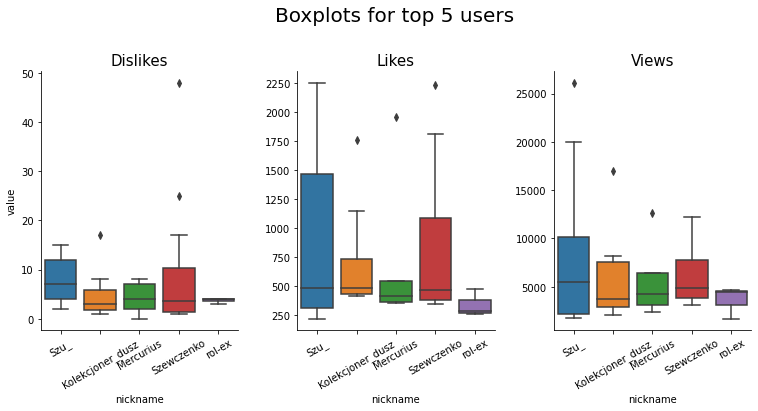

In [38]:
numerical_features = wykop[['dislikes','likes','views_new']].columns
data_comparison = pd.concat([wykop[wykop.nickname.isin(top_5_users.index)]['nickname'], wykop[numerical_features]], axis = 1)
data_comparison = data_comparison.melt(id_vars='nickname')

plot_top_5 = sns.catplot(
    data=data_comparison, x='nickname', y='value',
    col='variable', kind='box', col_wrap=4, height=5, aspect=0.7, sharey=False
)

plot_top_5.fig.subplots_adjust(top=0.8, wspace = 0.3)
plot_top_5.fig.suptitle('Boxplots for top 5 users',ha = 'right', fontsize = 20)
plot_top_5.set_xticklabels(rotation=30)

titles = ['Dislikes','Likes','Views']

for ax,title in zip(plot_top_5.axes.flatten(),titles):
    ax.set_title(title, fontsize = 15)

plt.show()

In [8]:
wykop[wykop.nickname.isin(top_5_users.index)]['nickname'].unique()

array(['Szu_', 'Kolekcjoner_dusz', 'Mercurius', 'Szewczenko', 'rol-ex'],
      dtype=object)

### Top 5 most likeable articles

In [9]:
wykop.sort_values(by = 'likes', ascending=False).head(5)

,dislikes,hashtags,likes,nickname,title,views,views_new
41,22,"europa,swiat",4138,dobrowolskii,Papież Franciszek o działaniach Władimira Puti...,43.5 tys.,43500.0
77,7,"swiat,twitter,internet,elonmusk,gielda,inwestycje",3443,kasza332,Elon Musk dopiął swego. Twitter akceptuje waru...,35.3 tys.,35300.0
93,12,"rosja,ukraina,wojna",3376,yosemitesam,Ukraina powołała komando do likwidacji rosyjsk...,24.4 tys.,24400.0
10,42,"polska,krakow,drogi,polskiedrogi,motoryzacja",3078,DOgi,"Wykopowicz wytknął błędy, teraz przeprojektują...",22.4 tys.,22400.0
35,4,"europa,irlandia,wojna,rosja,ukraina,geopolityka",2255,Szu_,Wściekłość w Irlandii po atomowych groźbach w ...,13.2 tys.,13200.0


### Top 5 most unlikeable articles

In [10]:
wykop.sort_values(by = 'dislikes',ascending=False).head(5)

,dislikes,hashtags,likes,nickname,title,views,views_new
44,161,"polska,ukraina,rosja,ruskimir,wojna,internet",787,MglawicaKraba,43 portale nadają codziennie antyukraińską pro...,13.3 tys.,13300.0
38,101,"franciszek,ukraina,wojna",1124,libertarian,Bojkot Kościoła katolickiego. Wciąż kontrowers...,10.7 tys.,10700.0
48,87,"polska,ukraina,wojna,rosja,ciekawostki,ruskimir",504,Wiggum89,Polski ochotnik na wojnie w Ukrainie,19.5 tys.,19500.0
88,66,"swiat,rosja,wojna,ciekawostki,heheszki,cocacola",1601,Wilson_,Ostatnia paleta,16.5 tys.,16500.0
87,52,"europa,ukraina,beksinski,python,sztucznainteli...",427,Rainforest,"Zdzisław Beksiński: ""Nadzieja na zgliszczach""....",9.4 tys.,9400.0


### Hashtags division

In [11]:
# Define how many additionals columns should we have

def define_number_of_hashtag_cols():
    
    len_max = 0
    
    for i in range(len(wykop.hashtags)):
        temp = len(wykop['hashtags'].str.split(',')[i])
        if temp > len_max:
            len_max = temp
    return len_max

def add_columns(no_of_new_cols):
    
    for i in range(no_of_new_cols):
        wykop[f'hashtag_{i+1}'] = wykop['hashtags'].str.split(',').str[i]
        
    return wykop

add_columns(define_number_of_hashtag_cols()).head()

,dislikes,hashtags,likes,nickname,title,views,views_new,hashtag_1,hashtag_2,hashtag_3,hashtag_4,hashtag_5,hashtag_6,hashtag_7
0,0,"technologia,nauka,zainteresowania,kosmos,mars,...",186,elektryk91,"NASA ma problem z Ingenuity, marsjańskim wirol...",2.4 tys.,2400.0,technologia,nauka,zainteresowania,kosmos,mars,ciekawostki,NaN
1,0,"rosja,historia,polityka,zbrodniekomunistyczne",86,Qtasus2Wielgus,Badacz zbrodni NKWD został wysłany do łagru,<1 tys.,1000.0,rosja,historia,polityka,zbrodniekomunistyczne,NaN,NaN,NaN
2,14,"polska,chlewobsranygownem",269,BennyHarvey,Łódzkie. Kradł znicze wrzucając do automatu st...,12.5 tys.,12500.0,polska,chlewobsranygownem,NaN,NaN,NaN,NaN,NaN
3,23,"polska,kultura,rozrywka",359,Wirtualnemedia_pl,Polsat zrealizuje polską wersję „Sługi Narodu”,7.9 tys.,7900.0,polska,kultura,rozrywka,NaN,NaN,NaN,NaN
4,39,"polska,technologia,amazon,afera",476,Mirxar,Strach coś zamawiać na Amazonie. Polacy płacą ...,13.4 tys.,13400.0,polska,technologia,amazon,afera,NaN,NaN,NaN


Now, we are going to calculate how many hashtags were used. We know, that one hashtag is a must, but our page can change dynamically. That's why, it is important to store in memory current number of scraped hashtags.

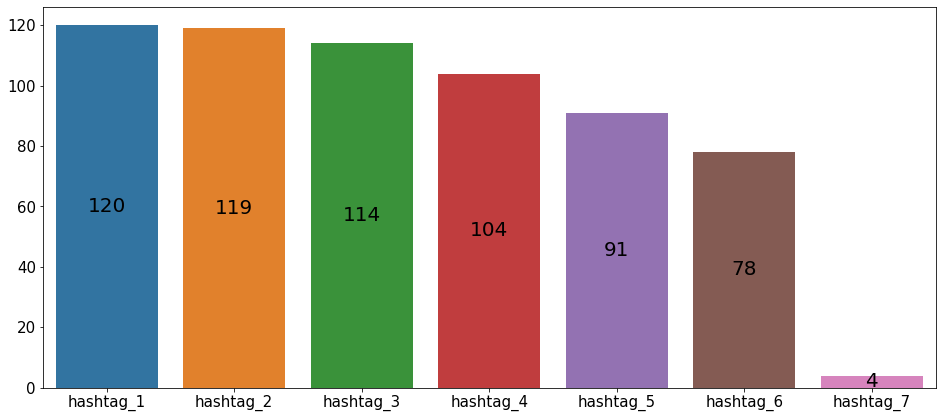

In [36]:
temp = wykop.loc[:, 'hashtag_1':f'hashtag_{define_number_of_hashtag_cols()}'].apply(lambda x: sum(x.notna()))

plt.figure(figsize = (16,7))
ax = sns.barplot(temp.index, temp.values)
ax.tick_params(labelsize = 15)

for annot in ax.containers:
    ax.bar_label(annot, label_type = "center", size = 20)
plt.show()

Until hashtag_4, we decided to show the 5 most frequently occurring words

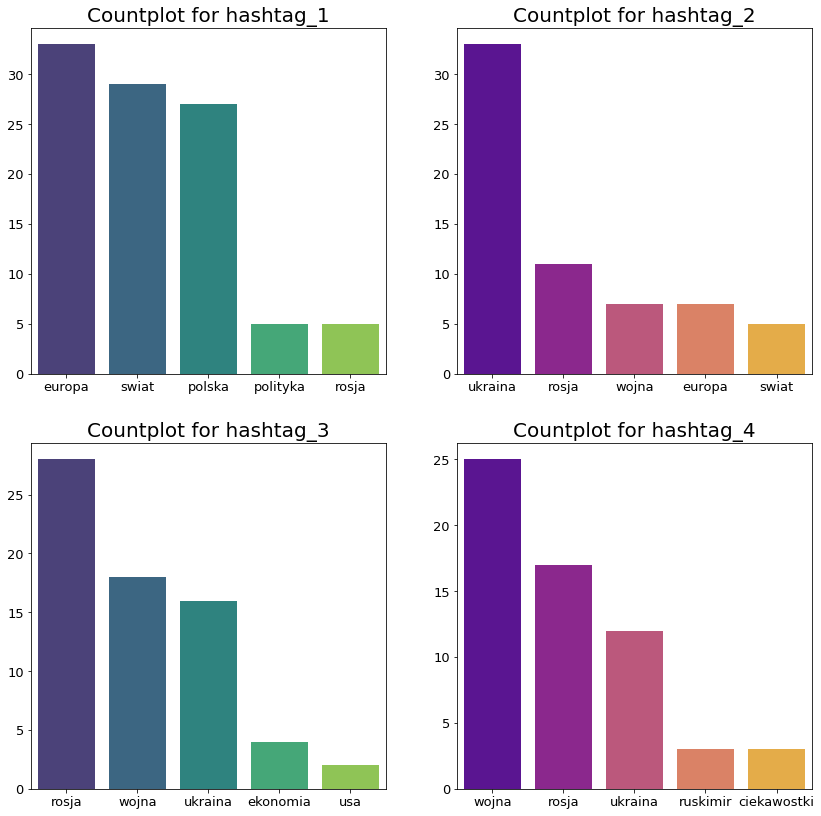

In [32]:
n_rows = 2
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*7, n_rows*7))
columns = wykop.loc[:, 'hashtag_1':'hashtag_6'].columns

for rows in range(0, n_rows):
    for cols in range(0, n_cols):
        
        temp = cols
        ax = axs[rows][cols]
        palette = ['viridis', 'plasma']
        temp_counts = wykop[columns[cols+rows if rows==0 else rows+cols+1]].value_counts().head()
        sns.barplot(temp_counts.index, temp_counts.values, ax=ax, palette = palette[cols])
        ax.set_title('Countplot for {}'.format(columns[cols+rows if rows==0 else rows+cols+1]), fontsize = 20)
        ax.tick_params(labelsize = 13)

Let's check, if we can obtain something from title section.

In [15]:
check_title = wykop.title.apply(lambda x: x.split(' ')[0]).value_counts().head()
check_title

Polska      3
Węgry       2
W           2
Ukraińcy    2
Ukraina     2
Name: title, dtype: int64

Unluckily, not at all.